# Transformer Architecture
Positional Encoding & Multi Headed Attention Sub Layer

* Word Embedding using Word2Vec: [Link](https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/)
* Attention Is All You Need: [Link](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)
* Self-Attention Illustrated: [Link](https://colab.research.google.com/drive/1rPk3ohrmVclqhH7uQ7qys4oznDdAhpzF), [Link](https://archive.ph/4VS2S)


## Diagram of a Transformer Model
![Transformer Model](https://miro.medium.com/v2/resize:fit:856/1*ZCFSvkKtppgew3cc7BIaug.png)

## Import Libaries

In [ ]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
#!pip install gensim
#!pip install nltk

In [1]:
import torch

In [2]:
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\newlo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
import math
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from scipy.special import softmax
import warnings

#notebook settings
warnings.filterwarnings(action = 'ignore')

In [41]:
from transformers import pipeline

## 1. Input (Import Text Data)

In [6]:
sample = open("dataset/text.txt", "r")
s = sample.read()

#remove escape characters
f = s.replace('\n', ' ')

#parse sentence
data = []
for i in sent_tokenize(f):
    temp = []
    #now tokenize sentence into words
    for j in word_tokenize(i):
      temp.append(j.lower())
    data.append(temp)

## 2. Input Embedding (Skip Gram Model)

![OpenAI Logo](https://media.geeksforgeeks.org/wp-content/uploads/skip_gram.png)

In [7]:
model = gensim.models.Word2Vec(data, min_count=1, vector_size=512, window=5, sg=1)

In [8]:
black = model.wv['black']
black

array([-0.06562666, -0.05351061, -0.00367221,  0.06062042, -0.00825019,
        0.03129761,  0.04094656, -0.0424781 ,  0.02367186, -0.00713359,
        0.02598262, -0.00719514, -0.00289508, -0.00929283, -0.02900256,
       -0.02728165,  0.03671551,  0.07769296, -0.07263705, -0.04485688,
        0.04485427, -0.03313118,  0.10418661,  0.02434326, -0.02192764,
        0.00515197,  0.03559645,  0.03915194, -0.00977631, -0.10745304,
       -0.01346472,  0.03907425,  0.02671207, -0.01067893, -0.00663914,
        0.00800821,  0.04495844, -0.05629048, -0.00073539, -0.01153074,
       -0.08249988,  0.08180326, -0.07897271, -0.04355659,  0.05569189,
        0.01140373, -0.00112619,  0.05680707,  0.0901883 ,  0.09711304,
       -0.05737246,  0.04957561,  0.05798693,  0.10256263, -0.06556486,
       -0.00416581,  0.0521906 , -0.04471232,  0.0099958 ,  0.05621516,
        0.0546289 , -0.03182605, -0.00359466,  0.02774827,  0.0114772 ,
       -0.0040597 , -0.03139506,  0.03170055, -0.02370839, -0.02

In [9]:
brown = model.wv['brown']
print(brown.shape)

(512,)


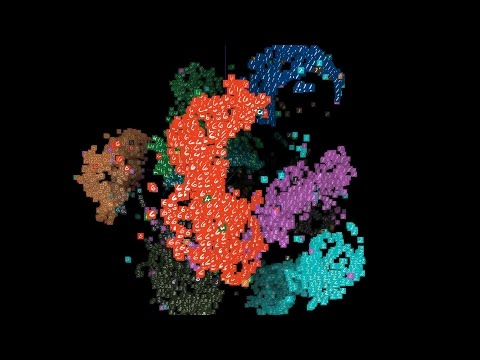

In [10]:
# We have 1 column and 512 rows representing a word in higher dimensional space.
# Hard to visualise but team at google give good examples
from IPython.display import YouTubeVideo
YouTubeVideo('wvsE8jm1GzE')

In [12]:
# compute cosine similarity
## Cosine similarity is the cosine of the angle between the vectors or the dot product of the vectors divided by the product of their lengths.
dot = np.dot(black, brown)
norma = np.linalg.norm(black) # normalise a
normb = np.linalg.norm(brown)
cos = dot / (norma * normb)
print(cos)

0.99951637


In [13]:
black_reshaped = black.reshape(1,512) # We reshape from having 1 column and 512 rows to 512 columns and 1 row
brown_reshaped = brown.reshape(1,512)
cos_lib = cosine_similarity(black_reshaped, brown_reshaped)
print(cos_lib)

[[0.99951637]]


## 3. Positional Encoding
We add small values to the word embedding output so that the positions are taken into account

In [14]:
# 1-The 2-black 3-cat 4-sat 5-on 6-the 7-couch 8-and 9-the 10-brown 11-dog 12-slept 13-on 14-the 15-rug.
pos1=2 #2-black
pos2=10 #10-brown

In [18]:
black_pos_encode_1 = black_reshaped.copy() #pe1
black_pos_encode_2 = black_reshaped.copy() #pe2
black_pos_encode_3 = black_reshaped.copy() #pe3

black_reshaped_pos_encode = black_reshaped.copy() # paa
brown_reshaped_pos_encode = brown_reshaped.copy() #pba

model_dims = 512
max_print = model_dims
max_length = 20

In [21]:
for i in range(0, max_print,2):
    black_pos_encode_1[0][i] = math.sin(pos1 / (10000 ** ((2 * i)/model_dims)))
    black_reshaped_pos_encode[0][i] = (black_reshaped_pos_encode[0][i]*math.sqrt(model_dims))+ black_pos_encode_1[0][i]
    black_pos_encode_1[0][i+1] = math.cos(pos1 / (10000 ** ((2 * i)/model_dims)))
    black_reshaped_pos_encode[0][i+1] = (black_reshaped_pos_encode[0][i+1]*math.sqrt(model_dims))+black_pos_encode_1[0][i+1]
    
    print(i,black_pos_encode_1[0][i],i+1,black_pos_encode_1[0][i+1])
    print(i,black_reshaped_pos_encode[0][i],i+1,black_reshaped_pos_encode[0][i+1])
    print("\n")
print(black_pos_encode_1)

0 0.9092974 1 -0.41614684
0 -273.2558 1 -842.8328


2 0.95814437 3 -0.28628543
2 470.665 3 548.95966


4 0.98704624 5 -0.16043596
4 433.10858 5 276.6564


6 0.9991642 7 -0.040876657
6 1009.5554 7 -514.01355


8 0.99748 9 0.07094825
8 808.5217 9 -44.642498


10 0.984703 11 0.17424123
10 828.4487 11 9.970928


12 0.9632266 13 0.2686903
12 482.39035 13 36.258266


14 0.9351183 15 0.35433567
14 164.87347 15 -126.27249


16 0.9021307 17 0.43146282
16 908.5639 17 1131.1947


18 0.8657256 19 0.5005189
18 -377.81116 19 -251.58598


20 0.8271038 21 0.5620492
20 962.6669 21 -82.78361


22 0.7872378 23 0.6166495
22 1628.6927 23 612.3168


24 0.74690354 25 0.6649324
24 146.0251 25 415.84283


26 0.7067105 27 0.7075028
26 790.9269 27 832.5424


28 0.6671291 29 0.7449421
28 244.07172 29 -845.85754


30 0.62851435 31 0.777798
30 180.65758 31 869.2944


32 0.5911271 33 0.8065784
32 626.0895 33 308.30756


34 0.55515176 35 0.8317491
34 220.43843 35 538.2846


36 0.5207113 37 0.8537328
36 799.7615 37 -1

In [22]:
#Pytorch implementation using torch.exp and math.log :
max_len=max_length                
pe = torch.zeros(max_len, model_dims)
position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
div_term = torch.exp(torch.arange(0, model_dims, 2).float() * (-math.log(10000.0) / model_dims))
pe[:, 0::2] = torch.sin(position * div_term)
pe[:, 1::2] = torch.cos(position * div_term)
print(pe[:, 0::2])

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 8.4147e-01,  8.2186e-01,  8.0196e-01,  ...,  1.1140e-04,
          1.0746e-04,  1.0366e-04],
        [ 9.0930e-01,  9.3641e-01,  9.5814e-01,  ...,  2.2279e-04,
          2.1492e-04,  2.0733e-04],
        ...,
        [-9.6140e-01, -6.3753e-01, -1.1153e-01,  ...,  1.8938e-03,
          1.8268e-03,  1.7623e-03],
        [-7.5099e-01, -9.9638e-01, -8.6358e-01,  ...,  2.0052e-03,
          1.9343e-03,  1.8659e-03],
        [ 1.4988e-01, -4.9773e-01, -9.2024e-01,  ...,  2.1165e-03,
          2.0418e-03,  1.9696e-03]])


In [24]:
for i in range(0, max_print,2):
        black_pos_encode_2[0][i] = math.sin(pos2 / (10000 ** ((2 * i)/model_dims)))
        brown_reshaped_pos_encode[0][i] = (brown_reshaped_pos_encode[0][i]*math.sqrt(model_dims))+ black_pos_encode_2[0][i]
        black_pos_encode_2[0][i+1] = math.cos(pos2 / (10000 ** ((2 * i)/model_dims)))
        brown_reshaped_pos_encode[0][i+1] = (brown_reshaped_pos_encode[0][i+1]*math.sqrt(model_dims))+ black_pos_encode_2[0][i+1]
            
        print(i,black_pos_encode_2[0][i],i+1,black_pos_encode_2[0][i+1])
        print(i,brown_reshaped_pos_encode[0][i],i+1,black_reshaped_pos_encode[0][i+1])
        print("\n")

0 -0.5440211 1 -0.8390715
0 -46.496387 1 -842.8328


2 0.118776485 3 -0.992921
2 0.6352707 3 548.95966


4 0.69263417 5 -0.72128904
4 11.749956 5 276.6564


6 0.9791748 7 -0.2030191
6 44.558495 7 -514.01355


8 0.93763274 9 0.34762743
8 34.31439 9 -44.642498


10 0.640478 11 0.7679765
10 29.683153 11 9.970928


12 0.209077 13 0.9778992
12 2.6728053 13 36.258266


14 -0.23791768 15 0.97128534
14 -20.159325 15 -126.27249


16 -0.61293674 17 0.790132
16 3.6411295 17 1131.1947


18 -0.8675198 19 0.4974026
18 -57.726562 19 -251.58598


20 -0.987656 21 0.15663856
20 -0.9042263 21 -82.78361


22 -0.9836992 23 -0.17982185
22 29.971205 23 612.3168


24 -0.87976724 25 -0.47540468
24 -33.184055 25 415.84283


26 -0.70512336 27 -0.70908463
26 1.5517714 27 832.5424


28 -0.48830694 29 -0.87267196
28 -17.09586 29 -845.85754


30 -0.2538085 31 -0.96725446
30 -12.01777 31 869.2944


32 -0.02068353 33 -0.9997861
32 12.446041 33 308.30756


34 0.1975573 35 -0.98029137
34 0.6362536 35 538.2846


36 0.392

In [25]:
print('black, brown')
cos_lib = cosine_similarity(black_reshaped, brown_reshaped)
print(cos_lib,"word similarity")
cos_lib = cosine_similarity(black_pos_encode_1, black_pos_encode_2)
print(cos_lib,"positional similarity")
cos_lib = cosine_similarity(black_reshaped_pos_encode, brown_reshaped_pos_encode)
print(cos_lib,"positional encoding similarity")

black, brown
[[0.99951637]] word similarity
[[0.8600013]] positional similarity
[[0.9597718]] positional encoding similarity


## 4. Multi Headed Attention Sub Layer

In [40]:
print("Step 1: Input : 3 inputs, d_model=4")
x =np.array([[1.0, 0.0, 1.0, 0.0],   # Input 1
             [0.0, 2.0, 0.0, 2.0],   # Input 2
             [1.0, 1.0, 1.0, 1.0]])  # Input 3
print(x)
print("\n")

print("Step 2: weights 3 dimensions x d_model=4")
print("w_query")
w_query =np.array([[1, 0, 1],
                   [1, 0, 0],
                   [0, 0, 1],
                   [0, 1, 1]])
print(w_query)
print("\n")

print("w_key")
w_key =np.array([[0, 0, 1],
                 [1, 1, 0],
                 [0, 1, 0],
                 [1, 1, 0]])
print(w_key)
print("\n")

print("w_value")
w_value = np.array([[0, 2, 0],
                    [0, 3, 0],
                    [1, 0, 3],
                    [1, 1, 0]])
print(w_value)

print("\n")
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Queries: x * w_query")
Q=np.matmul(x,w_query)
print(Q)

print("\n")

print("Keys: x * w_key")
K=np.matmul(x,w_key)
print(K)


print("Values: x * w_value")
V=np.matmul(x,w_value)
print(V)

print("\n")
print("Step 4: Scaled Attention Scores")
k_d=1   #square root of k_d=3 rounded down to 1 for this example
attention_scores = (Q @ K.transpose())/k_d
print(attention_scores)
print("\n")


print("Step 5: Scaled softmax attention_scores for each vector")
attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])
print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])
print("\n")

print("Step 6: attention value obtained by score1/k_d * V")
print(V[0])
print(V[1])
print(V[2])
print("Attention 1")
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)

print("Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)

print("Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)
print("\n")


print("Step 7: summed the results to create the first line of the output matrix")
attention_input1=attention1+attention2+attention3
print(attention_input1)
print("\n")


print("Step 8: Step 1 to 7 for inputs 1 to 3")
#This is an example we haven't actually trainined anything so we assume the 3 results come from learned weights
# Assuming we are implementing the original Transformer paper we will have 3 results of 64 dimensions each.
attention_head1=np.random.random((3, 64))
print(attention_head1)
print("\n")

print("Step 9: We assume we have trained the 8 heads of the attention sub-layer")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("shape of one head",z0h1.shape,"dimension of 8 heads",64*8)
print("\n")

print("Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model")
output_attention=np.hstack((z0h1,z1h2,z2h3,z3h4,z4h5,z5h6,z6h7,z7h8))
print(output_attention)
print("\n")

Step 1: Input : 3 inputs, d_model=4
[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


Step 2: weights 3 dimensions x d_model=4
w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]


w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]


w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


Step 3: Matrix multiplication to obtain Q,K,V
Queries: x * w_query
[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]


Keys: x * w_key
[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]
Values: x * w_value
[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


Step 4: Scaled Attention Scores
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


Step 5: Scaled softmax attention_scores for each vector
[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


Step 6: attention value obtained by score1/k_d * V
[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]
Attention 1
[0.06337894 0.12675788 0.19013681]
Attention 2
[0.93662106 3.74648425 0.        ]
Attention 3
[0.93662106 2.80986319 1.40493159]


Step 7: summed the resul

# 5. Full Transformer Architecture

In [43]:
translator = pipeline("translation_en_to_fr") # English to French translation pipeline

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [44]:
print(translator("Transformers are amazing at machine translation!", max_length=40))
#Transformers are amazing in machine translation

[{'translation_text': 'Les transformateurs sont extraordinaires en traduction automatique !'}]
